In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
 X = dataset.iloc[:,3:13]
 Y = dataset.iloc[:,13]

In [5]:
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
X = X.drop(['Geography','Gender'],axis=1)

In [7]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [8]:
X = pd.concat([X,geography,gender],axis =1)

In [9]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 42)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


In [13]:
model = Sequential()

In [20]:
model.add(Dense(10,input_shape=(11,),activation='relu'))

In [21]:
model.add(Dense(units = 10,activation='relu'))
model.add(Dropout(0.2))

In [23]:
model.add(Dense(units = 10,activation='relu'))
model.add(Dropout(0.3))

In [24]:
model.add(Dense(1,activation='sigmoid'))
model.add(Dropout(0.3))

In [30]:
model.compile(optimizer = opt,loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [33]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor ='val_loss',
    patience = 5,


)

In [35]:
model_history= model.fit(X_train,Y_train , validation_split=0.33,batch_size=10,epochs = 100,callbacks = early_stopping)

Epoch 1/100
536/536 [==============================] - 11s 6ms/step - loss: 1.2687 - accuracy: 0.7774 - val_loss: 0.4850 - val_accuracy: 0.7910
Epoch 2/100
536/536 [==============================] - 3s 6ms/step - loss: 1.2859 - accuracy: 0.7962 - val_loss: 0.4823 - val_accuracy: 0.7910
Epoch 3/100
536/536 [==============================] - 4s 7ms/step - loss: 1.2571 - accuracy: 0.7962 - val_loss: 0.4505 - val_accuracy: 0.7910
Epoch 4/100
536/536 [==============================] - 3s 6ms/step - loss: 1.2728 - accuracy: 0.7962 - val_loss: 0.4741 - val_accuracy: 0.7910
Epoch 5/100
536/536 [==============================] - 3s 6ms/step - loss: 1.2604 - accuracy: 0.7962 - val_loss: 0.4785 - val_accuracy: 0.7910
Epoch 6/100
536/536 [==============================] - 4s 8ms/step - loss: 1.2334 - accuracy: 0.7962 - val_loss: 0.4330 - val_accuracy: 0.7944
Epoch 7/100
536/536 [==============================] - 4s 8ms/step - loss: 1.4248 - accuracy: 0.8026 - val_loss: 0.5011 - val_accuracy: 0.791

In [36]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

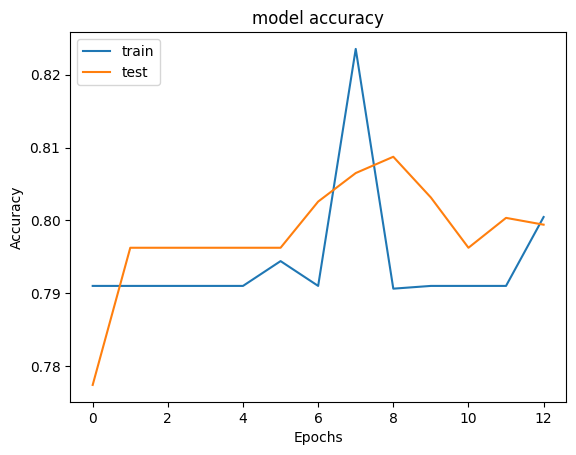

In [38]:
plt.plot(model_history.history['val_accuracy'])
plt.plot(model_history.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()



In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 7)                 84        
                                                                 
 dropout (Dropout)           (None, 7)                 0         
                                                                 
 dense_3 (Dense)             (None, 10)                80        
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                1

In [40]:
model.get_weights

<bound method Model.get_weights of <keras.engine.sequential.Sequential object at 0x7f1413f04130>>

In [42]:
model.save('model.h5')

In [50]:
import tensorflow as tf

# Load the model
model1 = tf.keras.models.load_model('model.h5')




In [51]:
model1.predict(X_test)

63/63 [==============================] - 0s 2ms/step


array([[0.07091711],
       [0.05266932],
       [0.13293962],
       ...,
       [0.25942013],
       [0.10521521],
       [0.2536784 ]], dtype=float32)

In [ ]:
## Regression problem

In [52]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [65]:
X= dataset[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited']]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,0
9997,709,France,Female,36,7,0.00,1,0,1,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,1


In [54]:
Y = dataset.iloc[:,12]

In [55]:
Y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [66]:
geography = pd.get_dummies(X['Geography'],drop_first=True)

gender = pd.get_dummies(X['Gender'],drop_first=True)

In [67]:
X = X.drop(['Geography','Gender'],axis=1)


In [68]:
X = pd.concat([X,geography,gender],axis =1)

In [69]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,0,0,1,0
2,502,42,8,159660.80,3,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,0,0,0,1
9996,516,35,10,57369.61,1,1,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,1,0,0,0
9998,772,42,3,75075.31,2,1,0,1,1,0,1


In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model1 = Sequential()
model1.add(Dense(10,input_shape=(11,),activation='relu'))
model1.add(Dense(units = 10,activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(units = 10,activation='relu'))
model1.add(Dropout(0.3))

model1.add(Dense(1,activation='linear'))
model1.add(Dropout(0.3))


import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [83]:

model1.compile(optimizer = opt,loss='mean_squared_error',metrics=['mean_squared_error'])

In [80]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor ='val_mean_squared_error',
    patience = 5,


)

In [85]:
model_history= model1.fit(X_train,Y_train , validation_split=0.33,batch_size=10,epochs = 100,callbacks = early_stopping)

Epoch 1/100
536/536 [==============================] - 4s 5ms/step - loss: 8751654912.0000 - mean_squared_error: 8751655936.0000 - val_loss: 4849428992.0000 - val_mean_squared_error: 4849428992.0000
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 7089752576.0000 - mean_squared_error: 7089752576.0000 - val_loss: 4895592448.0000 - val_mean_squared_error: 4895592448.0000
Epoch 3/100
536/536 [==============================] - 2s 5ms/step - loss: 6905734656.0000 - mean_squared_error: 6905734656.0000 - val_loss: 5265528320.0000 - val_mean_squared_error: 5265528320.0000
Epoch 4/100
536/536 [==============================] - 3s 5ms/step - loss: 6776546304.0000 - mean_squared_error: 6776546304.0000 - val_loss: 4972660736.0000 - val_mean_squared_error: 4972660736.0000
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 6936994304.0000 - mean_squared_error: 6936994304.0000 - val_loss: 5256290816.0000 - val_mean_squared_error: 5256290816.0000
Epoch

In [88]:
model1.predict(X_test)

63/63 [==============================] - 0s 1ms/step


array([[58864.65 ],
       [62818.145],
       [61983.98 ],
       ...,
       [63807.777],
       [54530.13 ],
       [59340.453]], dtype=float32)